# Reinforcement Learning Final Project 

Welcome to your Reinforcement Learning project focused on developing an RL agent capable of playing chess at a strategic level. Chess has long been considered a benchmark for measuring AI capabilities, and this project aims to leverage the power of RL to create an intelligent agent that can make optimal decisions in complex chess positions. By combining the principles of reinforcement learning with the rich strategic domain of chess, you will explore new approaches to create the most effective chess player.

## Project Objectives:

* Train an RL agent to play chess: The primary objective of this project is to develop an RL agent that can play chess at a high level of proficiency. The agent should be capable of evaluating chess positions and making strategic decisions.

* Optimize decision-making using RL algorithms: Explore different RL algorithms, as seen in class, to train the agent. Compare and analise their effectiveness in learning and decision-making capabilities in the context of chess.

* Use a challenging chess environment: Use a comprehensive environment for the agent to interact with, representing the rules and dynamics of chess. This environment will provide a realistic and challenging setting for the agent's training and evaluation.

* Evaluate and benchmark performance: Assess the performance of the RL agent against different benchmarks from existing chess engines. You will compare your agent's performance to established chess engines to measure progress and identify areas for improvement.


### Extra Objectives:

* Investigate transfer learning and generalization: Explore techniques for transfer learning to leverage knowledge acquired in related domains or from pre-training on large chess datasets. Investigate the agent's ability to generalize its knowledge.

* Enhance interpretability and analysis: Develop methods to analise the agent's decision-making process and provide insights into its strategic thinking. Investigate techniques to visualize the agent's evaluation of chess positions and understand its reasoning behind specific moves.

## Let's Play Chess! 

As you know [Chess](https://en.wikipedia.org/wiki/Chess) is a board game for two players, called White and Black, each controlling an army of chess pieces in their color, with the objective to checkmate the opponent's king.

Chess is an abstract strategy game that involves no hidden information and no use of dice or cards. It is played on a chessboard with 64 squares arranged in an eight-by-eight grid. At the start, each player controls sixteen pieces: one king, one queen, two rooks, two bishops, two knights, and eight pawns. White moves first, followed by Black. Checkmating the opponent's king involves putting the king under immediate attack (in "check") whereby there is no way for it to escape.


![](Images/CHESS_MOVES.PNG)

* The king moves one square in any direction. There is also a special move called castling that involves moving the king and a rook. The king is the most valuable piece — attacks on the king must be immediately countered, and if this is impossible, the game is immediately lost.
* A rook can move any number of squares along a rank or file, but cannot leap over other pieces. Along with the king, a rook is involved during the king's castling move.
* A bishop can move any number of squares diagonally, but cannot leap over other pieces.
* A queen combines the power of a rook and bishop and can move any number of squares along a rank, file, or diagonal, but cannot leap over other pieces.
* A knight moves to any of the closest squares that are not on the same rank, file, or diagonal. (Thus the move forms an "L"-shape: two squares vertically and one square horizontally, or two squares horizontally and one square vertically.) The knight is the only piece that can leap over other pieces.
* A pawn can move forward to the unoccupied square immediately in front of it on the same file, or on its first move it can advance two squares along the same file, provided both squares are unoccupied (black dots in the diagram). A pawn can capture an opponent's piece on a square diagonally in front of it by moving to that square (black crosses). It cannot capture a piece while advancing along the same file. A pawn has two special moves: the en passant capture and promotion.

## The [Environment](https://github.com/iamlucaswolf/gym-chess)

The environment gym-chess provides OpenAI Gym environments for the game of Chess. It comes with an implementation of the board and move encoding used in AlphaZero. 

Please install it using the command: 

`pip install gym-chess`

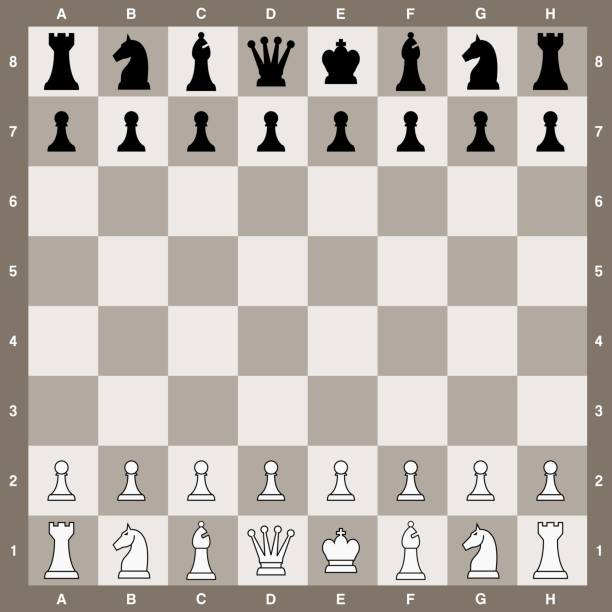


### A Two player's game

As you know chess is played by two players, as such the gym-chess environment gives you access to both players actions in a sequential matter.

In [1]:
    import chess
    import gym
    import gym_chess
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from tqdm.notebook import tqdm
    from collections import defaultdict
    import time
    from IPython.display import clear_output

In [2]:
np.__version__

'1.23.4'

In [3]:
figures = {
    '♛':1,
    '♜':2,
    '♝':2, 
    '♞':2,
    '♟':8,
    '♕':1,
    '♖':2,
    '♗':2,
    '♘':2,
    '♙':8}

figure_weights = {
    '♛':5,
    '♜':3,
    '♝':2,
    '♞':2,
    '♟':1,
    '♕':5,
    '♖':3,
    '♗':2,
    '♘':2,
    '♙':1,
}

## Global functions

In [4]:
def action_to_index(env, action):
    return env.legal_actions.index(action)

def index_to_action(env, index):
    return env.legal_actions[index]

# Stupid Player  
def RandomAction(env, state):
    legal_actions = env.legal_actions
    action = np.random.choice(legal_actions)
    return action
    
def QLearning(env, state, epsilon, Q_table):
    legal_actions = env.legal_actions
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.choice(legal_actions)
    else:
        q_values = Q_table[state]
        legal_indices = [action_to_index(env, a) for a in legal_actions]
        valid_indices = [i for i in legal_indices if i >= 0 and i < q_values.shape[0]]
        legal_q_values = q_values[valid_indices]

        if len(legal_q_values) > 0:
            best_index = np.argmax(legal_q_values)
            try:
                action = index_to_action(env, valid_indices[best_index])
            except:
                action = np.random.choice(legal_actions)
        else:
            action = np.random.choice(legal_actions)
    return action


# Monte Carlo
def MonteCarlo(env, state):
    legal_actions = env.legal_actions
    action_values = defaultdict(float)

    for action in legal_actions:
        action_index = action_to_index(env, action)  # Convert the action to an index
        if action_index >= 0:  # Ensure the action index is valid
            move = index_to_action(env, action_index)
            if move in env.legal_moves:
                for _ in range(n_simulations):
                    # Simulate the game with the current action
                    rewards = simulate(env, move, state)  # Modified to return rewards per move
                    total_reward = sum(rewards)
                    action_values[action_index] += total_reward

    if action_values:
        # Select the action index with the highest cumulative reward
        best_action_index = max(action_values, key=action_values.get)
        best_action = index_to_action(env, best_action_index)  # Convert the index to an action
    else:
        # If no rewards were accumulated, choose a random action
        best_action = np.random.choice(legal_actions)
    return best_action

def action_by_player_policy(env, state, epsilon, policy_type):
    if policy_type == 'MC':
        return MonteCarlo(env, state)
    elif policy_type == 'QL':
        return QLearning(env, state, epsilon,Q_table)
    elif policy_type == 'RA':
        return RandomAction(env, state)

def simulate(env, action, state):
    next_state, reward, done, info = env.step(action)
    rewards = [reward]

    while not done:
        opponent_action = np.random.choice(env.legal_actions)
        next_state, opponent_reward, done, info = env.step(opponent_action)
        rewards.append(opponent_reward)

    return next_state, rewards, done, info

def print_stats(results):
    for i in set(results):
        print(f'{i} wins in {np.round(100*results.count(i)/len(results), 2)}% of games')

In [5]:
# Game Visualisation
def choose_action():
    legal_actions = env.legal_actions
    action = np.random.choice(legal_actions)
    return action

def display_board(env):
    board = env.render(mode='unicode').replace('⭘', '*')
    print(board, '\n')
    
# Random actions Visualisation
env = gym.make("ChessAlphaZero-v0")
state = env.reset()
for i in range(10):
    action = choose_action()
    next_state, reward, done, info = env.step(action)
    print(reward)
    display_board(env)
    time.sleep(1)
    clear_output(wait=True)
    
env.close()

0.0
♜ ♞ ♝ * ♚ ♝ * ♜
♟ ♟ * ♟ ♟ ♟ ♟ ♟
* * * * * ♞ * *
* ♛ ♟ * * * * *
* * * * ♘ * * *
♙ * * ♙ * * ♙ *
* ♙ ♙ * ♙ ♙ * ♙
♖ * ♗ ♕ ♔ ♗ ♘ ♖ 



### Plots

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_rewards(rewards):
    white_cumulative_rewards = np.cumsum(rewards[0])
    black_cumulative_rewards = np.cumsum(rewards[1])

    plt.plot(range(len(white_cumulative_rewards)), white_cumulative_rewards, label='White Player')
    plt.plot(range(len(black_cumulative_rewards)), black_cumulative_rewards, label='Black Player')
    plt.xlabel('Step')
    plt.ylabel('Cumulative Reward')
    plt.title('Cumulative Rewards per Step in Last Episode')
    plt.legend()
    plt.show()


# Approach 1

- Q-Learning VS Random actions
- Reward for winning only

In [7]:
DEBUG = True
# Q-learning parameters
alpha = 0.01  # Learning rate
gamma = 0.99  # Discount factor
decay_rate = 0.99  # Decay rate for epsilon for exponential
#decay_rate = 0.001  # Decay rate for epsilon for linear

# Initialize Q-table
num_actions = 4672
num_states = 8 * 8 * 119
n_simulations = 100  # Adjust the number of Monte Carlo simulations for faster gameplay
Q_table = np.zeros((num_states, num_actions))

In [8]:
def update_Q_table_Last_Move_Reward(env, state, action, next_state, rewards):
    current_value = Q_table[state, action]
    max_future_value = np.max(Q_table[next_state])

    # Define rewards and penalties
    capture_reward = 1.0  # Reward for capturing an important piece
    advancement_reward = 0.5  # Reward for advancing towards the opponent's side
    strategic_goal_reward = 1.5  # Reward for achieving strategic goals
    illegal_move_penalty = -1.0  # Penalty for illegal moves
    disadvantage_penalty = -0.5  # Penalty for moves resulting in a disadvantageous position
    
    new_value = current_value + alpha * (rewards + gamma * max_future_value)
    Q_table[state, action] = new_value


In [9]:
def peform_episode_app1(algorithms:dict, DEBUG=False, speed=.2, max_steps=100):
    env = gym.make("ChessAlphaZero-v0")  # We will use Alpha Zero's nomenclature for the action encodings
    state = env.reset()
    done = False
    counter = 0
    total_rewards = [0, 0]  # Store the total rewards for both players
    epsilon = 1

    while not done:
        if DEBUG:
            time.sleep(speed)
            clear_output(wait=True)
            display_board(env)
            
        if counter==max_steps:
            break
        
        if counter % 2 == 0:
            # Exponential decay of epsilon
            epsilon *= decay_rate
            epsilon = max(epsilon, 0.01)  # Minimum epsilon value
            action = action_by_player_policy(env, state, epsilon, algorithms['WHITE'])
            next_state, rewards, done, info = env.step(action)
            rewards = [rewards] if not isinstance(rewards, list) else rewards  # Ensure rewards is a list
            if DEBUG:
                print(f'Step: {counter}')
                print("White player action:", action)
                print("White player rewards:", rewards)
                
            if algorithms['WHITE'] == 'QL':
                update_Q_table_Last_Move_Reward(env, state, action, next_state, rewards)
                epsilon *= decay_rate # Exponential decay of epsilon
                epsilon = max(epsilon, 0.01)# Minimum epsilon value
            total_rewards[0] += sum(rewards)  # Accumulate the rewards for the white player
            
        else:
            action = action_by_player_policy(env, state, epsilon, algorithms['BLACK'])
            next_state, rewards, done, info = env.step(action)
            rewards = [rewards] if not isinstance(rewards, list) else rewards  # Ensure rewards is a list
            if DEBUG:
                print(f'Step: {counter}')
                print("Black player action:", action)
                print("Black player rewards:", rewards)
                
            if algorithms['BLACK'] == 'QL':
                update_Q_table_Last_Move_Reward(env, state, action, next_state, rewards)
                epsilon *= decay_rate # Exponential decay of epsilon
                epsilon = max(epsilon, 0.01)# Minimum epsilon value
                
            total_rewards[1] += sum(rewards)  # Accumulate the rewards for the black player
        state = next_state
        counter += 1
        
    if DEBUG:
        print("Total Rewards - White Player:", total_rewards[0])
        print("Total Rewards - Black Player:", total_rewards[1])

    # Determine the winner based on the total rewards
    if total_rewards[0] > total_rewards[1]:
        winner='WHITE'
    elif total_rewards[0] < total_rewards[1]:
        winner='BLACK'
    else:
        winner = 'DRAW'
        
    if DEBUG:   
        print(f"{winner} wins!")
    env.close()
    return winner

In [10]:
E=100
results_QL_RA_Last_Reward = []
Q_table = np.zeros((num_states, num_actions))
for episode in tqdm(range(E)):
    winner = peform_episode_app1(algorithms={'WHITE':'QL', 'BLACK':'RA'}, DEBUG=False, max_steps=100)
    results_QL_RA_Last_Reward.append(winner)
print_stats(results_QL_RA_Last_Reward)

  0%|          | 0/100 [00:00<?, ?it/s]

DRAW wins in 96.0% of games
WHITE wins in 4.0% of games


In [11]:
peform_episode_app1(algorithms={'WHITE':'QL', 'BLACK':'RA'}, DEBUG=True, max_steps=100, speed=.5)

* * * * * * * ♚
* * * ♝ * * * *
♜ * * ♟ ♟ * ♟ *
♟ ♙ * * ♙ * * *
♙ * * ♘ * ♗ ♞ *
♙ * ♖ * * * * *
* ♘ ♜ * * * * *
* * * * * * * ♔ 

Total Rewards - White Player: 0.0
Total Rewards - Black Player: 0.0
DRAW wins!


'DRAW'

In [12]:
E=100
results_RA_QL_Last_Reward = []
Q_table = np.zeros((num_states, num_actions))
for episode in tqdm(range(E)):
    winner = peform_episode_app1(algorithms={'WHITE':'RA', 'BLACK':'QL'}, DEBUG=False, max_steps=100)
    results_RA_QL_Last_Reward.append(winner)
print_stats(results_RA_QL_Last_Reward)

  0%|          | 0/100 [00:00<?, ?it/s]

DRAW wins in 97.0% of games
WHITE wins in 3.0% of games


In [13]:
peform_episode_app1(algorithms={'WHITE':'QL', 'BLACK':'RA'}, DEBUG=True, max_steps=100, speed=.5)

* * * * * * ♚ *
* * * ♝ * * ♗ *
♟ * ♟ * * * * *
* * * ♖ * * * ♟
♙ ♟ * * * ♜ * ♙
* * ♙ * * ♙ * *
♞ * ♗ ♔ ♛ * ♙ *
♖ * * ♞ * * * * 

Total Rewards - White Player: 0.0
Total Rewards - Black Player: 0.0
DRAW wins!


'DRAW'

# Approach 1.2

- Q-Learning VS Random actions
- Reward for every action

In [14]:
DEBUG = True
# Q-learning parameters
alpha = 0.01  # Learning rate
gamma = 0.99  # Discount factor
decay_rate = 0.99  # Decay rate for epsilon for exponential
#decay_rate = 0.001  # Decay rate for epsilon for linear

# Initialize Q-table
num_actions = 4672
num_states = 8 * 8 * 119
n_simulations = 100  # Adjust the number of Monte Carlo simulations for faster gameplay
Q_table = np.zeros((num_states, num_actions))

In [15]:
def count_figures(env):
    row = env.render(mode='unicode')
    current_figures=dict()
    for f in figures.keys():
        current_figures[f] = row.count(f)
    return current_figures
    
def get_reward(prev_set, curr_set):
    reward = (0,0)
    for figure in curr_set.keys():
        if (curr_set[figure] < prev_set[figure]) and (figure in ['♛','♜','♝','♞','♟']):
            reward = (figure_weights[figure], -figure_weights[figure])
            return reward
        elif (curr_set[figure] < prev_set[figure]) and (figure in ['♕','♖','♗','♘','♙']):
            reward = (-figure_weights[figure], figure_weights[figure])
            return reward
    return reward

In [102]:
def update_Q_table(env, state, action, next_state, prev_set, current_set, color):
    current_value = Q_table[state, action]
    max_future_value = np.max(Q_table[next_state])
    
    rewards_white, rewards_black = get_reward(prev_set, current_set)
    
    if color == 'W':
        new_value = current_value + alpha * (rewards_white + gamma * max_future_value)
    else:
        new_value = current_value + alpha * (rewards_black + gamma * max_future_value)
        
    Q_table[state, action] = new_value
    return rewards_white, rewards_black

In [17]:
def peform_episode_app2(algorithms:dict, DEBUG=False, speed=.2, max_steps=150):
    global Q_table
    env = gym.make("ChessAlphaZero-v0")  # We will use Alpha Zero's nomenclature for the action encodings
    state = env.reset()
    done = False
    counter = 0
    total_rewards = [0, 0]  # Store the total rewards for both players
    epsilon = 1
    current_set = figures.copy()
    history=[]
    while not done:
        if DEBUG:
            time.sleep(speed)
            clear_output(wait=True)
            display_board(env)
        
        if counter==max_steps:
            break
            
        if counter % 2 == 0:
            # Exponential decay of epsilon
            epsilon *= decay_rate
            epsilon = max(epsilon, 0.01)  # Minimum epsilon value
            action = action_by_player_policy(env, state, epsilon, algorithms['WHITE'])
            next_state, rewards, done, info = env.step(action)
            
            prev_set, current_set = current_set, count_figures(env) 
            if algorithms['WHITE'] == 'QL':
                rewards_white, rewards_black = update_Q_table(env, state, action, next_state, prev_set, current_set, 'W')
                total_rewards[0] += rewards_white  # Accumulate the rewards for the white player
                total_rewards[1] += rewards_black
                
            else:
                rewards_white, rewards_black = get_reward(prev_set, current_set)
                total_rewards[0] += rewards_white  # Accumulate the rewards for the white player
                total_rewards[1] += rewards_black  # Accumulate the rewards for the black player
                
            if DEBUG:
                print(f'Step: {counter}')
                print("White player action:", action)
                print("White player rewards:", rewards)
                
        else:
            # Exponential decay of epsilon
            epsilon *= decay_rate
            epsilon = max(epsilon, 0.01)  # Minimum epsilon value
            action = action_by_player_policy(env, state, epsilon, algorithms['BLACK'])
            next_state, rewards, done, info = env.step(action)
                
            prev_set, current_set = current_set, count_figures(env)
            if algorithms['BLACK'] == 'QL':
                
                rewards_white, rewards_black = update_Q_table(env, state, action, next_state, prev_set, current_set, 'B')
                total_rewards[0] += rewards_white  # Accumulate the rewards for the white player
                total_rewards[1] += rewards_black  # Accumulate the rewards for the black player
            else:
                rewards_white, rewards_black = get_reward(prev_set, current_set)
                total_rewards[0] += rewards_white  # Accumulate the rewards for the white player
                total_rewards[1] += rewards_black  # Accumulate the rewards for the black player
                
            if DEBUG:
                print(f'Step: {counter}')
                print("Black player action:", action)
                print("Black player rewards:", rewards)
                
        history.append((rewards_white, rewards_black))
        state = next_state
        counter += 1
        
    if DEBUG:
        print("Total Rewards - White Player:", total_rewards[0])
        print("Total Rewards - Black Player:", total_rewards[1])

    # Determine the winner based on the total rewards
    if total_rewards[0] > total_rewards[1]:
        winner='WHITE'
    elif total_rewards[0] < total_rewards[1]:
        winner='BLACK'
    else:
        winner = 'DRAW'
        
    if DEBUG:   
        print(f"{winner} wins!")
    env.close()
    return winner, (total_rewards[0], total_rewards[1]), history

In [18]:
E=100
results_QL_RA_Reward, all_rews_QL_RA_Reward = [], []
Q_table = np.zeros((num_states, num_actions))
for episode in tqdm(range(E)):
    winner, rews, history = peform_episode_app2(algorithms={'WHITE':'QL', 'BLACK':'RA'}, DEBUG=False, max_steps=100)
    results_QL_RA_Reward.append(winner)
    all_rews_QL_RA_Reward.append(rews)
print_stats(results_QL_RA_Reward)

  0%|          | 0/100 [00:00<?, ?it/s]

BLACK wins in 49.0% of games
WHITE wins in 43.0% of games
DRAW wins in 8.0% of games


In [19]:
winner, rews, history = peform_episode_app2(algorithms={'WHITE':'QL', 'BLACK':'RA'}, DEBUG=True, max_steps=100, speed=.3)

* * ♜ * * * * *
♜ ♟ * ♞ * * * ♟
♟ * ♖ * * ♝ ♟ ♚
♙ * ♟ * ♟ ♝ * ♙
* * ♙ * ♟ ♟ * *
* ♙ * * * * * *
* ♔ * * ♛ * ♙ *
* * * * ♘ * ♖ * 

Total Rewards - White Player: -17
Total Rewards - Black Player: 17
BLACK wins!


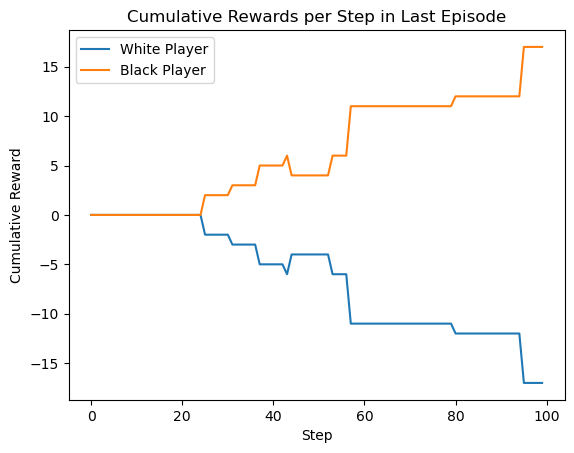

In [20]:
# Plot rewards per player in the last episode
plot_rewards([[i[0] for i in history], [i[1] for i in history]])

In [21]:
E=100
results_RA_QL_Reward, all_rews_RA_QL_Reward = [], []
Q_table = np.zeros((num_states, num_actions))
for episode in tqdm(range(E)):
    winner, rews, history = peform_episode_app2(algorithms={'WHITE':'RA', 'BLACK':'QL'}, DEBUG=False, max_steps=100)
    results_RA_QL_Reward.append(winner)
    all_rews_RA_QL_Reward.append(rews)
print_stats(results_RA_QL_Reward)

  0%|          | 0/100 [00:00<?, ?it/s]

BLACK wins in 52.0% of games
WHITE wins in 44.0% of games
DRAW wins in 4.0% of games


In [22]:
winner, rews, history = peform_episode_app2(algorithms={'WHITE':'RA', 'BLACK':'QL'}, DEBUG=True, max_steps=100, speed=.5)

* * * * * ♞ * ♗
* * * ♝ * ♚ * ♟
* * * * * * * ♞
* * * ♟ * ♟ * *
* ♖ ♜ * * ♙ * ♟
♙ * ♘ ♔ * * * *
* * * * * * ♙ *
* * ♝ * ♖ * * * 

Total Rewards - White Player: 0
Total Rewards - Black Player: 0
DRAW wins!


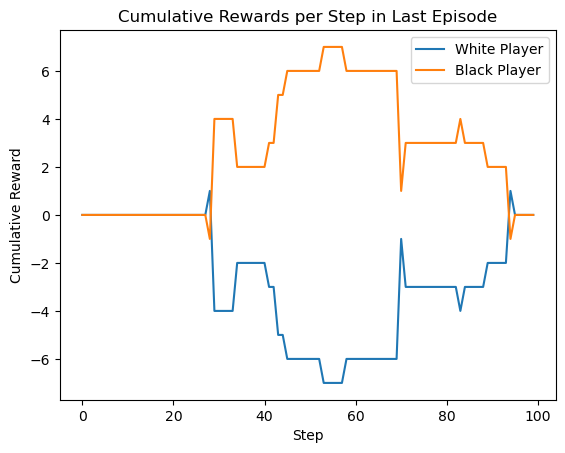

In [23]:
# Plot rewards per player in the last episode
plot_rewards([[i[0] for i in history], [i[1] for i in history]])

# Approach 2
- MonteCarlo VS Random actions
- Reward for winning only

In [24]:
DEBUG = True

num_actions = 4672
num_states = 8 * 8 * 119
n_simulations = 100  # Adjust the number of Monte Carlo simulations for faster gameplay

In [25]:
def peform_episode_app3(algorithms:dict, DEBUG=False, speed=.2, max_steps=150):
    env = gym.make("ChessAlphaZero-v0")  # We will use Alpha Zero's nomenclature for the action encodings
    state = env.reset()
    done = False
    counter = 0
    total_rewards = [0, 0]  # Store the total rewards for both players
    epsilon = 1
    current_set = figures.copy()
    while not done:
        if DEBUG:
            time.sleep(speed)
            clear_output(wait=True)
            display_board(env)
        
        if counter==max_steps:
            break
            
        if counter % 2 == 0:
            action = action_by_player_policy(env, state, epsilon, algorithms['WHITE'])
            next_state, rewards, done, info = env.step(action)
            total_rewards[0] += rewards
            
            if DEBUG:
                print(f'Step: {counter}')
                print("White player action:", action)
                print("White player rewards:", rewards)
                
        else:
            action = action_by_player_policy(env, state, epsilon, algorithms['BLACK'])
            next_state, rewards, done, info = env.step(action)
            total_rewards[1] += rewards
                
            if DEBUG:
                print(f'Step: {counter}')
                print("Black player action:", action)
                print("Black player rewards:", rewards)
                
        state = next_state
        counter += 1
        
    if DEBUG:
        print("Total Rewards - White Player:", total_rewards[0])
        print("Total Rewards - Black Player:", total_rewards[1])

    # Determine the winner based on the total rewards
    if total_rewards[0] > total_rewards[1]:
        winner='WHITE'
    elif total_rewards[0] < total_rewards[1]:
        winner='BLACK'
    else:
        winner = 'DRAW'
        
    if DEBUG:   
        print(f"{winner} wins!")
    env.close()
    return winner, (total_rewards[0], total_rewards[1])

In [26]:
E=100
results_MC_RA_Last_Reward = []
Q_table = np.zeros((num_states, num_actions))
for episode in tqdm(range(E)):
    winner = peform_episode_app3(algorithms={'WHITE':'MC', 'BLACK':'RA'}, DEBUG=False, max_steps=100)
    results_MC_RA_Last_Reward.append(winner)
print_stats(results_QL_RA_Last_Reward)

  0%|          | 0/100 [00:00<?, ?it/s]

DRAW wins in 96.0% of games
WHITE wins in 4.0% of games


In [27]:
peform_episode_app3(algorithms={'WHITE':'MC', 'BLACK':'RA'}, DEBUG=True, max_steps=100)

* * * * * * * *
* * * * * ♚ * *
* * * * ♟ * * *
* * ♖ * ♝ * ♙ *
* * ♟ * ♞ * * *
♖ ♟ * * ♙ ♙ * *
* * * ♗ ♔ ♟ * ♜
* * * * * ♞ ♖ * 

Total Rewards - White Player: 0.0
Total Rewards - Black Player: 0.0
DRAW wins!


('DRAW', (0.0, 0.0))

In [28]:
E=100
results_RA_MC_Last_Reward = []
Q_table = np.zeros((num_states, num_actions))
for episode in tqdm(range(E)):
    winner = peform_episode_app3(algorithms={'WHITE':'RA', 'BLACK':'MC'}, DEBUG=False, max_steps=100)
    results_RA_MC_Last_Reward.append(winner)
print_stats(results_RA_MC_Last_Reward)

  0%|          | 0/100 [00:00<?, ?it/s]

('WHITE', (0.0, -1.0)) wins in 3.0% of games
('DRAW', (0.0, 0.0)) wins in 95.0% of games
('WHITE', (1.0, 0.0)) wins in 2.0% of games


In [29]:
peform_episode_app3(algorithms={'WHITE':'RA', 'BLACK':'MC'}, DEBUG=True, max_steps=100)

* * ♖ * * * ♞ *
* ♘ * * * * ♚ *
♜ ♟ * * * * ♙ *
* * * * ♟ * * *
♟ ♙ ♙ * ♙ * * ♟
♘ * * * * * * ♙
♙ * * ♗ ♝ ♕ * *
* * * * ♖ * ♔ * 

Total Rewards - White Player: 0.0
Total Rewards - Black Player: 0.0
DRAW wins!


('DRAW', (0.0, 0.0))

# Approach 2.2
- MonteCarlo VS Random actions
- Reward for every action

In [30]:
DEBUG = True

num_actions = 4672
num_states = 8 * 8 * 119
n_simulations = 100  # Adjust the number of Monte Carlo simulations for faster gameplay

In [31]:
def perform_episode_app4(algorithms:dict, DEBUG=False, speed=.2, max_steps=150):
    env = gym.make("ChessAlphaZero-v0")  # We will use Alpha Zero's nomenclature for the action encodings
    state = env.reset()
    done = False
    counter = 0
    total_rewards = [0, 0]  # Store the total rewards for both players
    epsilon = 1
    current_set = figures.copy()
    history=[]
    while not done:
        if DEBUG:
            time.sleep(speed)
            clear_output(wait=True)
            display_board(env)
        
        if counter==max_steps:
            break
            
        if counter % 2 == 0:
            action = action_by_player_policy(env, state, epsilon, algorithms['WHITE'])
            next_state, rewards, done, info = env.step(action)
            prev_set, current_set = current_set, count_figures(env)
            rewards_white, rewards_black = get_reward(prev_set, current_set)
            total_rewards[0] += rewards_white  # Accumulate the rewards for the white player
            total_rewards[1] += rewards_black  # Accumulate the rewards for the black player
            
            if DEBUG:
                print(f'Step: {counter}')
                print("White player action:", action)
                print("White player rewards:", rewards)
                
        else:
            action = action_by_player_policy(env, state, epsilon, algorithms['BLACK'])
            next_state, rewards, done, info = env.step(action)
            prev_set, current_set = current_set, count_figures(env)
            rewards_white, rewards_black = get_reward(prev_set, current_set)
            total_rewards[0] += rewards_white  # Accumulate the rewards for the white player
            total_rewards[1] += rewards_black  # Accumulate the rewards for the black player
                
            if DEBUG:
                print(f'Step: {counter}')
                print("Black player action:", action)
                print("Black player rewards:", rewards)
             
        history.append((rewards_white, rewards_black))
        state = next_state
        counter += 1
        
    if DEBUG:
        print("Total Rewards - White Player:", total_rewards[0])
        print("Total Rewards - Black Player:", total_rewards[1])

    # Determine the winner based on the total rewards
    if total_rewards[0] > total_rewards[1]:
        winner='WHITE'
    elif total_rewards[0] < total_rewards[1]:
        winner='BLACK'
    else:
        winner = 'DRAW'
        
    if DEBUG:   
        print(f"{winner} wins!")
    env.close()
    return winner, (total_rewards[0], total_rewards[1]), history

In [32]:
E=100
results_MC_RA_Reward, all_rews_MC_RA_Reward = [], []
for episode in tqdm(range(E)):
    winner, rews, history = perform_episode_app4(algorithms={'WHITE':'MC', 'BLACK':'RA'}, DEBUG=False, max_steps=100)
    results_MC_RA_Reward.append(winner)
    all_rews_MC_RA_Reward.append(rews)
    
print_stats(results_MC_RA_Reward)

  0%|          | 0/100 [00:00<?, ?it/s]

BLACK wins in 39.0% of games
WHITE wins in 53.0% of games
DRAW wins in 8.0% of games


In [33]:
winner, rews, history = perform_episode_app4(algorithms={'WHITE':'MC', 'BLACK':'RA'}, DEBUG=True, max_steps=100, speed=.5)

* * * * * * * *
♜ * * * * * * ♜
* ♟ * ♖ * * * ♙
* ♛ ♟ * * * * ♚
* * * * ♙ * * *
* * * * ♟ * * ♙
♙ ♗ * * ♙ * ♗ *
* ♞ * ♔ * * * * 

Total Rewards - White Player: -4
Total Rewards - Black Player: 4
BLACK wins!


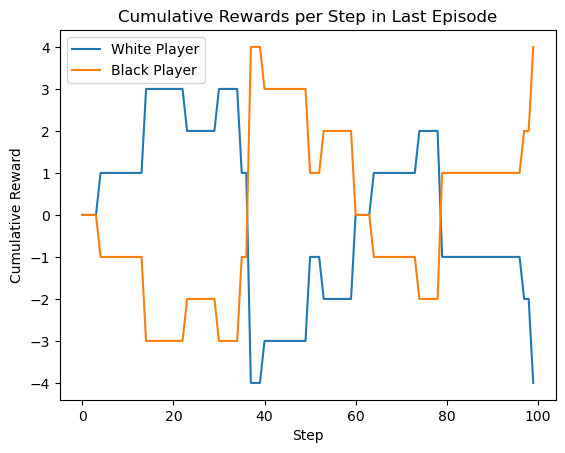

In [34]:
# Plot rewards per player in the last episode
plot_rewards([[i[0] for i in history], [i[1] for i in history]])

In [35]:
E=100
results_RA_MC_Reward, all_rews_RA_MC_Reward = [], []
for episode in tqdm(range(E)):
    winner, rews, history = perform_episode_app4(algorithms={'WHITE':'RA', 'BLACK':'MC'}, DEBUG=False, max_steps=100)
    results_RA_MC_Reward.append(winner)
    all_rews_RA_MC_Reward.append(rews)
    
print_stats(results_RA_MC_Reward)

  0%|          | 0/100 [00:00<?, ?it/s]

DRAW wins in 5.0% of games
WHITE wins in 47.0% of games
BLACK wins in 48.0% of games


In [36]:
winner, rews, history = perform_episode_app4(algorithms={'WHITE':'RA', 'BLACK':'MC'}, DEBUG=True, max_steps=100, speed=.5)


* * * * * ♛ ♜ ♜
* ♟ * ♚ * * * *
♟ * * * * * * *
* ♝ * * ♝ ♘ ♟ ♗
♖ * ♙ * ♞ * ♙ *
* * * * * * * ♙
* * * * ♘ ♙ ♔ *
* * ♞ * * * * ♖ 

Total Rewards - White Player: -6
Total Rewards - Black Player: 6
BLACK wins!


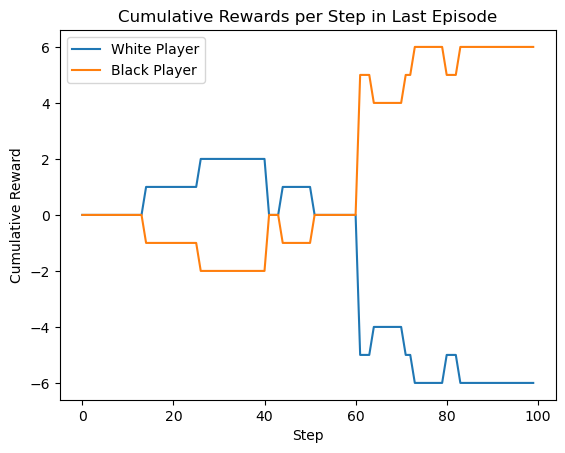

In [37]:
# Plot rewards per player in the last episode
plot_rewards([[i[0] for i in history], [i[1] for i in history]])

# Approach 3
- QLearning vs MonteCarlo

In [38]:
DEBUG = True

num_actions = 4672
num_states = 8 * 8 * 119
n_simulations = 100  # Adjust the number of Monte Carlo simulations for faster gameplay

In [39]:
def perform_episode_app5(algorithms: dict, Q_table, DEBUG=False, speed=.2, max_steps=150):
    env = gym.make("ChessAlphaZero-v0")
    state = env.reset()
    done = False
    counter = 0
    total_rewards = [0, 0]
    epsilon = 1
    current_set = figures.copy()
    history = []
    while not done:
        if DEBUG:
            time.sleep(speed)
            clear_output(wait=True)
            display_board(env)

        if counter == max_steps:
            break

        if counter % 2 == 0:
            if algorithms['WHITE'] == 'MC':
                action = action_by_player_policy(env, state, epsilon, algorithms['WHITE'])
            elif algorithms['WHITE'] == 'QL':
                action = QLearning(env, state, epsilon, Q_table)
            else:
                raise ValueError("Invalid algorithm for the WHITE player.")

            next_state, _, done, _ = env.step(action)
            prev_set, current_set = current_set, count_figures(env)
            rewards_white, rewards_black = get_reward(prev_set, current_set)
            total_rewards[0] += rewards_white  # Accumulate the rewards for the white player
            total_rewards[1] += rewards_black  # Accumulate the rewards for the black player

            if DEBUG:
                print(f'Step: {counter}')
                print("White player action:", action)
                print("White player rewards:", total_rewards[0])

        else:
            if algorithms['BLACK'] == 'MC':
                action = action_by_player_policy(env, state, epsilon, algorithms['BLACK'])
            elif algorithms['BLACK'] == 'QL':
                action = QLearning(env, state, epsilon, Q_table)
            else:
                raise ValueError("Invalid algorithm for the BLACK player.")

            next_state, _, done, _ = env.step(action)
            prev_set, current_set = current_set, count_figures(env)
            rewards_white, rewards_black = get_reward(prev_set, current_set)
            total_rewards[0] += rewards_white  # Accumulate the rewards for the white player
            total_rewards[1] += rewards_black  # Accumulate the rewards for the black player

            if DEBUG:
                print(f'Step: {counter}')
                print("Black player action:", action)
                print("Black player rewards:", total_rewards[1])
        history.append((rewards_white, rewards_black))
        state = next_state
        counter += 1

    if DEBUG:
        print("Total Rewards - White Player:", total_rewards[0])
        print("Total Rewards - Black Player:", total_rewards[1])

    if total_rewards[0] > total_rewards[1]:
        winner = 'WHITE'
    elif total_rewards[0] < total_rewards[1]:
        winner = 'BLACK'
    else:
        winner = 'DRAW'

    if DEBUG:
        print(f"{winner} wins!")
    env.close()
    return winner, (total_rewards[0], total_rewards[1]), history


In [40]:
E = 100
results_QL_MC, all_rews_QL_MC = [], []
Q_table = np.zeros((num_states, num_actions))

for episode in tqdm(range(E)):
    winner, rews, history = perform_episode_app5(algorithms={'WHITE': 'QL', 'BLACK': 'MC'}, Q_table=Q_table, DEBUG=False, max_steps=100)
    results_QL_MC.append(winner)
    all_rews_QL_MC.append(rews)

print_stats(results_QL_MC)


  0%|          | 0/100 [00:00<?, ?it/s]

BLACK wins in 41.0% of games
WHITE wins in 54.0% of games
DRAW wins in 5.0% of games


In [41]:
winner, rews, history = perform_episode_app5(algorithms={'WHITE':'QL', 'BLACK':'MC'}, Q_table=Q_table, DEBUG=True, max_steps=100, speed=.5)

* * * * * * * ♜
♟ * * ♞ ♜ ♚ * *
♙ ♟ ♟ * * * * ♝
* * * ♟ * * * *
♝ * * ♙ * ♟ * *
♔ ♘ ♙ * ♟ * * *
* * * * ♙ * * ♖
* * * * * ♛ * * 

Total Rewards - White Player: -14
Total Rewards - Black Player: 14
BLACK wins!


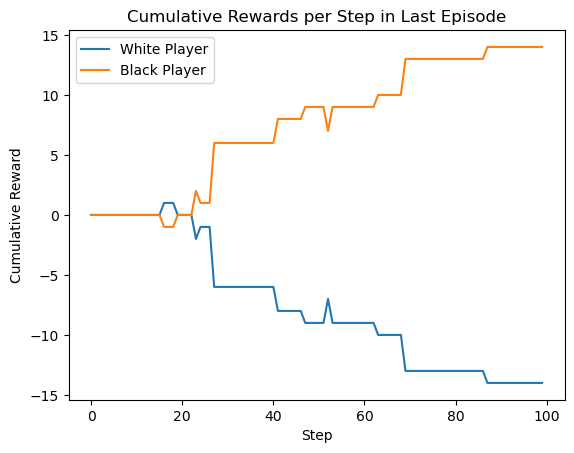

In [42]:
# Plot rewards per player in the last episode
plot_rewards([[i[0] for i in history], [i[1] for i in history]])

In [43]:
E = 100
results_MC_QL, all_rews_MC_QL = [], []
Q_table = np.zeros((num_states, num_actions))

for episode in tqdm(range(E)):
    winner, rews, history = perform_episode_app5(algorithms={'WHITE': 'MC', 'BLACK': 'QL'}, Q_table=Q_table, DEBUG=False, max_steps=100)
    results_MC_QL.append(winner)
    all_rews_MC_QL.append(rews)

print_stats(results_MC_QL)


  0%|          | 0/100 [00:00<?, ?it/s]

BLACK wins in 46.0% of games
WHITE wins in 50.0% of games
DRAW wins in 4.0% of games


In [44]:
winner, rews, history = perform_episode_app5(algorithms={'WHITE':'MC', 'BLACK':'QL'}, Q_table=Q_table,DEBUG=True, max_steps=100, speed=.5)

* * * * ♗ * ♚ *
* ♝ ♛ * * * * *
* ♟ * * ♟ ♙ * *
* * ♞ * * * ♟ *
♙ * * ♙ * * * ♜
♖ * ♙ * * * * ♙
♔ * * * * ♘ * ♙
♖ * * * * * * * 

Total Rewards - White Player: 1
Total Rewards - Black Player: -1
WHITE wins!


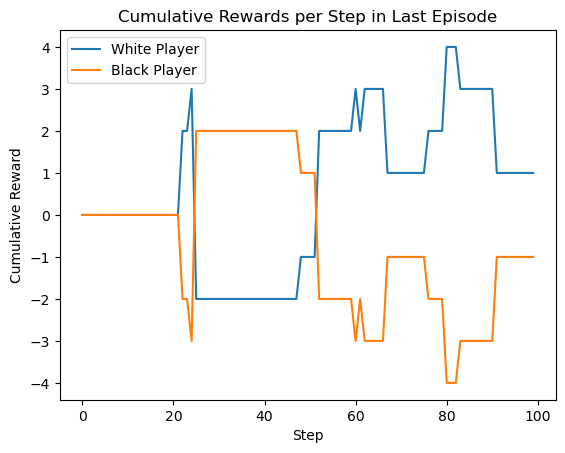

In [45]:
# Plot rewards per player in the last episode
plot_rewards([[i[0] for i in history], [i[1] for i in history]])

### Model VS Stockfish

In [46]:
from stockfish import Stockfish
Stockfish_path = "C:\\Users\\Chip7 MemMartins\\Documents\\Projetos\\Uni\\2ºSemester\\Reinforcement Learning\\Project\\Final Project Materials-20230516\\Final Project Materials-20230516\\stockfish_15.1_win_x64_avx2\\stockfish_15.1_win_x64_avx2\\stockfish-windows-2022-x86-64-avx2.exe"
stockfish = Stockfish(Stockfish_path)

In [47]:
DEBUG = True

num_actions = 4672
num_states = 8 * 8 * 119
n_simulations = 100  # Adjust the number of Monte Carlo simulations for faster gameplay

In [94]:
def perform_episode_app6(algorithm, color, stockfish_elo, DEBUG=False, speed=0.2, max_steps=150):
    global Q_table
    env = gym.make("ChessAlphaZero-v0")
    state = env.reset()
    done = False
    counter = 0
    total_rewards = [0, 0]
    epsilon = 1
    current_set = figures.copy()
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(stockfish_elo)
    history = []
    while not done:
        if DEBUG:
            time.sleep(speed)
            clear_output(wait=True)
            display_board(env)

        if counter == max_steps:
            break

        if (color == "WHITE" and counter % 2 == 0) or (color == "BLACK" and counter % 2 != 0):
            epsilon *= decay_rate
            epsilon = max(epsilon, 0.01)
            if algorithm == "QL":
                action = QLearning(env, state, epsilon,Q_table)
            elif algorithm == "MC":
                action = MonteCarlo(env, state)
            else:
                action = stockfish.get_best_move()

            try:
                next_state, rewards, done, info = env.step(action)
            except TypeError:
                continue

            prev_set, current_set = current_set, count_figures(env)
            if algorithm == "QL":
                rewards_white, rewards_black = update_Q_table(env, state, action, next_state, prev_set, current_set,
                                                              color[0])
                total_rewards[0] += rewards_white  # Accumulate the rewards for the white player
                total_rewards[1] += rewards_black  # Accumulate the rewards for the black player
            else:
                rewards_white, rewards_black = get_reward(prev_set, current_set)
                total_rewards[0] += rewards_white  # Accumulate the rewards for the white player
                total_rewards[1] += rewards_black  # Accumulate the rewards for the black player

            history.append((rewards_white, rewards_black))
            state = next_state
        else:
            epsilon *= decay_rate
            epsilon = max(epsilon, 0.01)
            if algorithm == "QL":
                action = QLearning(env, state, epsilon,Q_table)
            elif algorithm == "MC":
                action = MonteCarlo(env, state)
            else:
                action = stockfish.get_best_move()

            try:
                next_state, rewards, done, info = env.step(action)
            except TypeError:
                continue

            prev_set, current_set = current_set, count_figures(env)
            if algorithm == "QL":
                rewards_white, rewards_black = update_Q_table(env, state, action, next_state, prev_set, current_set,
                                                              color[0])
                total_rewards[0] += rewards_white  # Accumulate the rewards for the white player
                total_rewards[1] += rewards_black  # Accumulate the rewards for the black player
            else:
                rewards_white, rewards_black = get_reward(prev_set, current_set)
                total_rewards[0] += rewards_white  # Accumulate the rewards for the white player
                total_rewards[1] += rewards_black  # Accumulate the rewards for the black player

            history.append((rewards_white, rewards_black))
            state = next_state
        counter += 1

    if DEBUG:
        print("Total Rewards - White Player:", total_rewards[0])
        print("Total Rewards - Black Player:", total_rewards[1])

    if total_rewards[0] > total_rewards[1]:
        winner = "WHITE"
    elif total_rewards[0] < total_rewards[1]:
        winner = "BLACK"
    else:
        winner = "DRAW"

    if DEBUG:
        print(f"{winner} wins!")
    env.close()
    return winner, (total_rewards[0], total_rewards[1])

### QLearning VS Stockfish

###### For saving processing power we decrease the number of Episodes: 100 -> 30 = Demonstration 

##### White: QLearning | Black: Stockfish

In [73]:
E = 30
results_QL_stock, all_rews_QL_stock = [], []
Q_table = np.zeros((num_states, num_actions))

for episode in tqdm(range(E)):
    winner, rews = perform_episode_app6(algorithm='QL', color='WHITE', stockfish_elo=100, DEBUG=False, max_steps=100)
    results_QL_stock.append(winner)
    all_rews_QL_stock.append(rews)

print_stats(results_QL_stock)


  0%|          | 0/30 [00:00<?, ?it/s]

BLACK wins in 40.0% of games
WHITE wins in 50.0% of games
DRAW wins in 10.0% of games


In [77]:
perform_episode_app6(algorithm="QL", color="WHITE", stockfish_elo=100, DEBUG=True, max_steps=100, speed=0.5)

* * * ♝ * ♚ ♞ ♗
♜ * * ♝ * * * *
* ♟ * * ♟ * ♗ *
* * * * * * * ♟
♙ * * ♙ ♙ ♙ * ♙
* ♟ * ♛ * * * ♘
* ♖ * * ♕ * ♙ *
* ♘ * * ♔ * ♖ * 

Total Rewards - White Player: 7
Total Rewards - Black Player: -7
WHITE wins!


('WHITE', (7, -7))

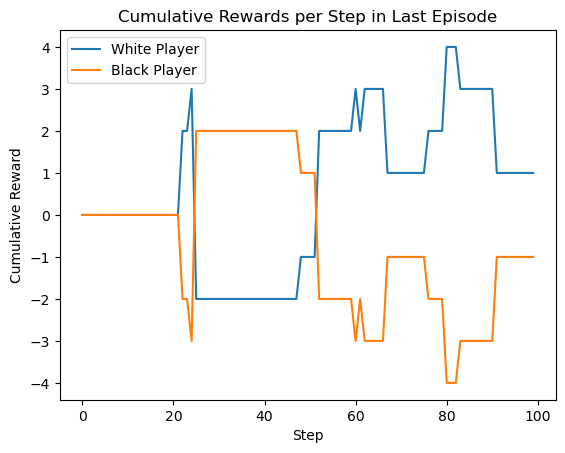

In [78]:
# Plot rewards per player in the last episode
plot_rewards([[i[0] for i in history], [i[1] for i in history]])

##### White: Stockfish | Black: QLearning

In [79]:
E = 30
results_stock_QL, all_rews_stock_QL = [], []
Q_table = np.zeros((num_states, num_actions))

for episode in tqdm(range(E)):
    winner, rews = perform_episode_app6(algorithm='QL', color='BLACK', stockfish_elo=100, DEBUG=False, max_steps=100)
    results_stock_QL.append(winner)
    all_rews_stock_QL.append(rews)

print_stats(results_stock_QL)

  0%|          | 0/30 [00:00<?, ?it/s]

BLACK wins in 46.67% of games
WHITE wins in 43.33% of games
DRAW wins in 10.0% of games


In [80]:
perform_episode_app6(algorithm="QL", color="BLACK", stockfish_elo=100, DEBUG=True, max_steps=100, speed=0.5)

♝ ♞ * * * * * ♞
* * * * * * * *
* * ♙ * * * * ♝
* * * ♟ * ♟ * *
♟ * * * * * * ♚
♙ * ♗ * * * * ♘
♙ * * ♕ * ♟ ♗ ♙
♘ ♔ * * ♖ * * ♖ 

Total Rewards - White Player: 11
Total Rewards - Black Player: -11
WHITE wins!


('WHITE', (11, -11))

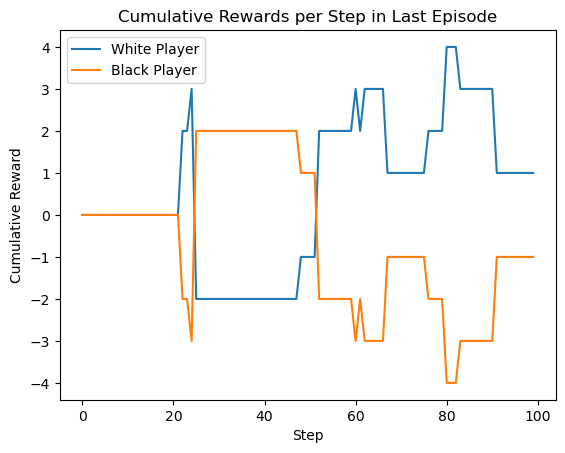

In [81]:
# Plot rewards per player in the last episode
plot_rewards([[i[0] for i in history], [i[1] for i in history]])

### Monte Carlo VS Stockfish

##### White: Monte Carlo | Black: Stockfish

In [86]:
E = 30
results_MC_stock, all_rews_MC_stock = [], []
Q_table = np.zeros((num_states, num_actions))

for episode in tqdm(range(E)):
    winner, rews = perform_episode_app6(algorithm='MC', color='WHITE', stockfish_elo=100, DEBUG=False, max_steps=100)
    results_MC_stock.append(winner)
    all_rews_MC_stock.append(rews)

print_stats(results_MC_stock)

  0%|          | 0/30 [00:00<?, ?it/s]

BLACK wins in 63.33% of games
WHITE wins in 30.0% of games
DRAW wins in 6.67% of games


In [87]:
perform_episode_app6(algorithm="MC", color="WHITE", stockfish_elo=100, DEBUG=True, max_steps=100, speed=0.5)

* * ♞ * * ♝ ♚ *
* * * ♞ * * * *
* ♟ ♟ * * * ♟ *
* * ♙ ♙ * * ♘ ♟
♜ * * * ♙ * ♜ *
♙ * * * * * * ♟
* * * ♔ * * * *
* * * * * ♝ * ♛ 

Total Rewards - White Player: -10
Total Rewards - Black Player: 10
BLACK wins!


('BLACK', (-10, 10))

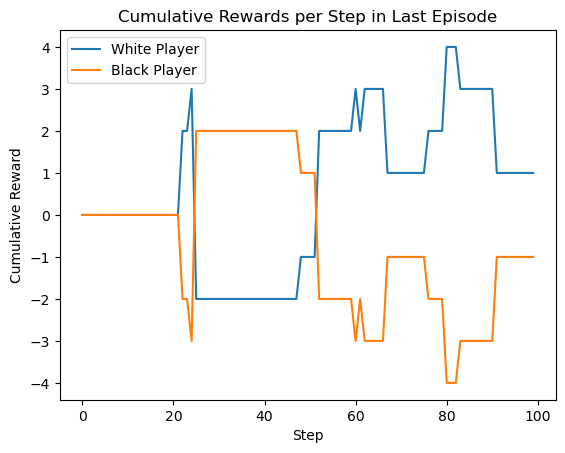

In [88]:
# Plot rewards per player in the last episode
plot_rewards([[i[0] for i in history], [i[1] for i in history]])

##### White: Stockfish | Black: Monte Carlo

In [89]:
E = 30
results_stock_MC, all_rews_stock_MC = [], []
Q_table = np.zeros((num_states, num_actions))

for episode in tqdm(range(E)):
    winner, rews = perform_episode_app6(algorithm='MC', color='BLACK', stockfish_elo=100, DEBUG=False, max_steps=100)
    results_stock_MC.append(winner)
    all_rews_stock_MC.append(rews)

print_stats(results_stock_QL)

  0%|          | 0/30 [00:00<?, ?it/s]

BLACK wins in 46.67% of games
WHITE wins in 43.33% of games
DRAW wins in 10.0% of games


In [90]:
perform_episode_app6(algorithm="MC", color="BLACK", stockfish_elo=100, DEBUG=True, max_steps=100, speed=0.5)

♝ * ♜ * * * * *
♟ * * ♟ ♝ * * *
* ♙ * * ♚ * * ♞
♙ * ♗ * * ♟ ♟ *
* * ♙ * ♜ * ♙ *
* * * * ♖ * * ♙
* * * * * * * *
* * ♘ * ♖ ♗ ♔ * 

Total Rewards - White Player: 1
Total Rewards - Black Player: -1
WHITE wins!


('WHITE', (1, -1))

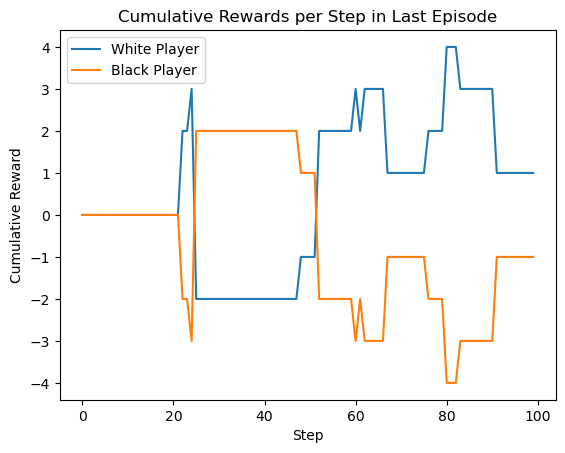

In [91]:
# Plot rewards per player in the last episode
plot_rewards([[i[0] for i in history], [i[1] for i in history]])

# Conclusion

In conclusion, we experienced that how we structure the reward mechanism is how we guide the learning path of the model itself. The exponential growth in the success of our models once we gave rewards after removing chess pieces instead of strictly rewarding them for the end of episode result was the decision in this project with the biggest impact. In the future, we now know that how we reward the model might just be the most crucial point in order to succeed in all the other details of Reinforcemnt Learning model training as well.